# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [4]:
# Libraries
import numpy as np
import pandas as pd
# Your Code Here

In [7]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
data = pd.read_csv(r'../data/Fitbit2.csv')
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [16]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]

data.head()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [21]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
data.groupby('months').mean().steps


months
April        13079.033333
August       11584.774194
December      8470.064516
February      8922.866667
January       9892.064516
July          9193.322581
June         12536.166667
March        10312.935484
May          10620.096774
November      9467.466667
October       8272.451613
September     9191.333333
Name: steps, dtype: float64

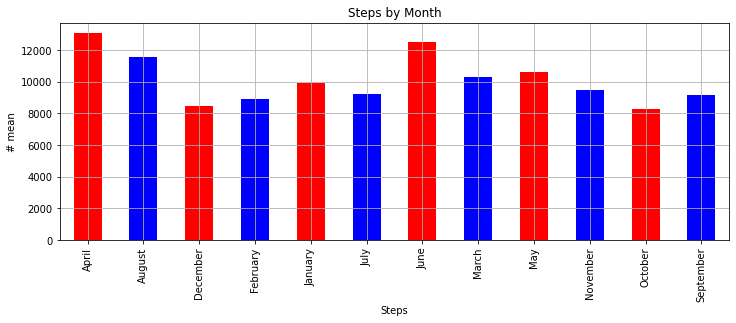

In [31]:
ax=data.groupby('months').mean().steps.plot(
        
        kind='bar',
        color=['r', 'b'],
        grid=True,
        figsize=(12, 4),
        title='Steps by Month'
)

ax.set_xlabel('Steps')
ax.set_ylabel('# mean')

plt.show();

<AxesSubplot:>

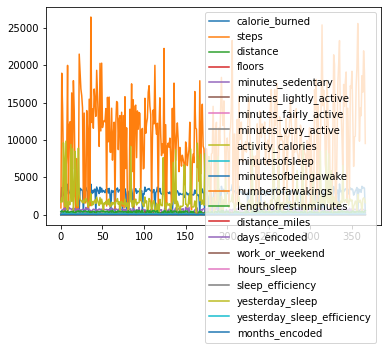

In [20]:
data.plot()

In [29]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
data.groupby('work_or_weekend').mean().steps


work_or_weekend
0    10064.238095
1    10144.572519
Name: steps, dtype: float64

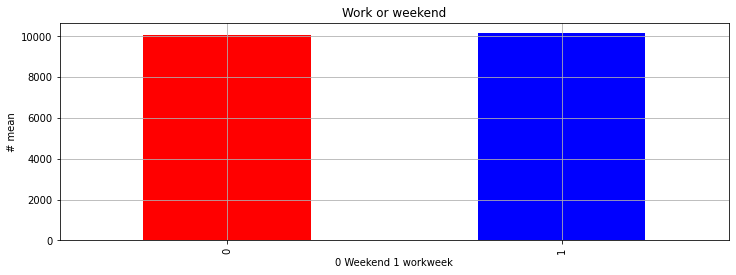

In [38]:
ax=data.groupby('work_or_weekend', 'minutes_very_active' ).mean().steps.plot(
        
        kind='bar',
        color=['r', 'b'],
        grid=True,
        figsize=(12, 4),
        title='Work or weekend'
)

ax.set_xlabel('0 Weekend 1 workweek')
ax.set_ylabel('# mean')

plt.show();

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

NameError: name 'tab' is not defined

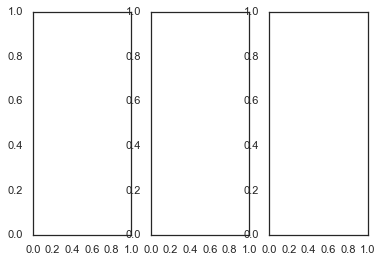

In [210]:
lista= ['minutes_lightly_active' 'minutes_sedentary	','minutes_very_active']
fig, ax = plt.subplots(1, 3)   # pinta 1 fila 3 columnas, 3 plots en fila

for i, cat in enumerate(lista):
    
    tab.loc[cat].plot.pie(ax=ax[i], autopct='%1.2f%%', startangle=90)

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [62]:
# your code here
titanic= pd.read_csv(r'../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


In [92]:
titanic.columns=[e.lower().replace(' ', '_') for e in titanic.columns]

titanic.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [65]:
# your code here

titanic.dtypes

passengerid      int64
survived       float64
pclass           int64
name            object
gender          object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [66]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=np.number)



,passengerid,survived,pclass,age,sibsp,parch,fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [67]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=["number","bool_"])

,name,gender,ticket,cabin,embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [119]:
import matplotlib.pyplot as plt

plt.style.use('classic')

import numpy as np

%matplotlib inline

plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

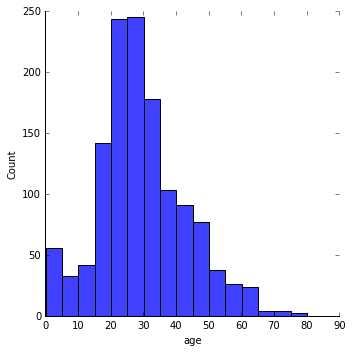

In [123]:
# your code here
age_frq = sns.displot(titanic.age, binwidth=5)




#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [97]:
for n, age in enumerate(titanic):
    print(n, age)

0 passengerid
1 survived
2 pclass
3 name
4 gender
5 age
6 sibsp
7 parch
8 ticket
9 fare
10 cabin
11 embarked


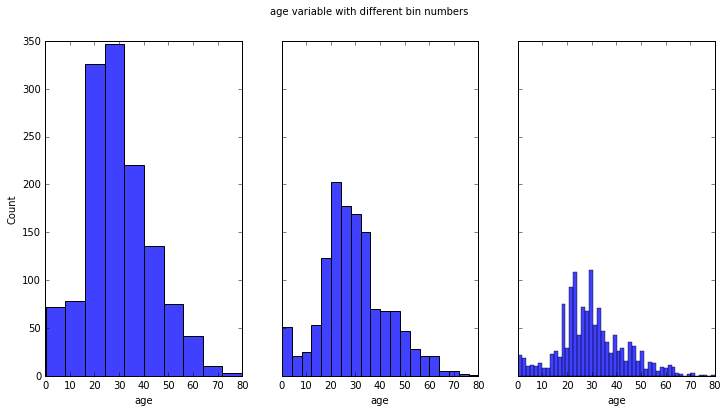

In [157]:
#ha costado la vida


fig, axes = plt.subplots(1,3, figsize=(12, 6), sharey=True)

fig.suptitle('age variable with different bin numbers')

lista_bins=[10,20,50]

for i,e in enumerate(lista_bins):
    sns.histplot(ax=axes[i], data=titanic['age'], bins=e)


IndexError: tuple index out of range

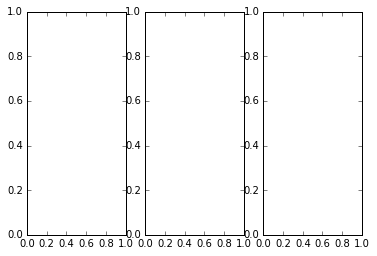

In [146]:
'''lista = [10, 20, 50]
   # figura de 1 fila 3 columnas

ax=plt.subplots(1, 3)


for elemento in lista:

    titanic['age'].plot.hist(ax=ax[elemento], bins=elemento) '''


#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
from more readable a less readable - increases visibility
"""

#### Use seaborn to show the distribution of column `Age`.

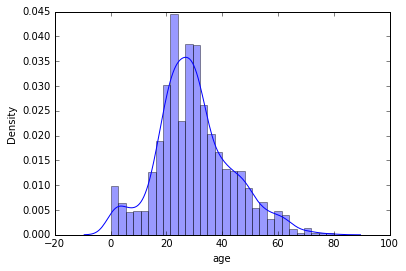

In [102]:
# your code here
sns.distplot(titanic.age);



#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

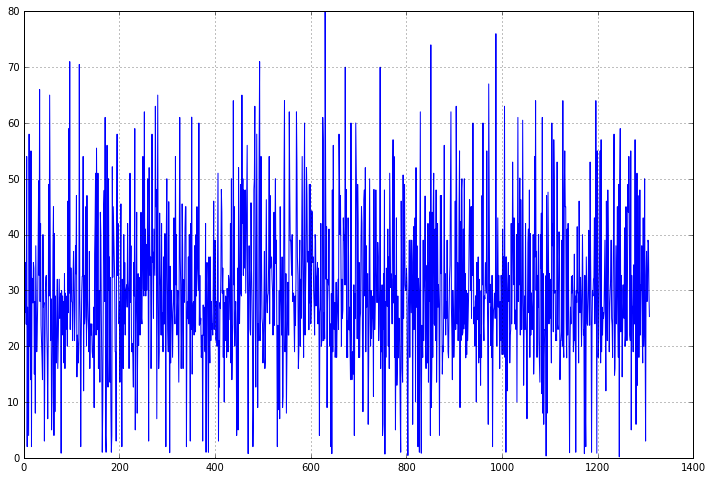

In [115]:
# Method 1 - matplotlib
titanic.age.plot( figsize=(12,8),
                                grid=True)

ax.set_xlabel('Tipo de oferta')
ax.set_ylabel('Tasa Engage %')

plt.show();

# your code here

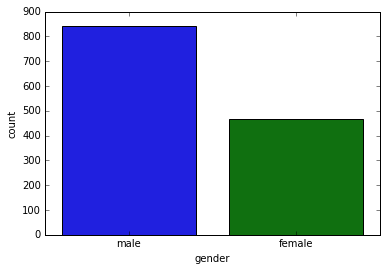

In [105]:
# Method 2 - seaborn

sns.countplot(x=titanic.gender);





# your code here

#### Use the right plot to visualize the column `Pclass`.

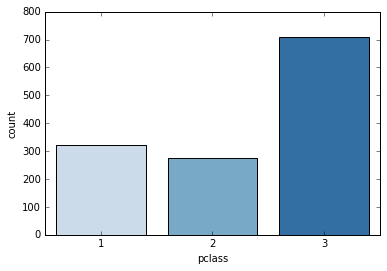

In [118]:
# your code here

sns.countplot(x=titanic.pclass, palette='Blues');


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [168]:
corr=titanic.corr(method='pearson')
corr

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
sibsp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


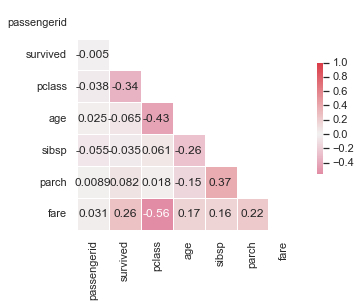

In [165]:
sns.set(style='white')     # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );

In [ ]:
pocas correlaciones y en muchos casos negativas

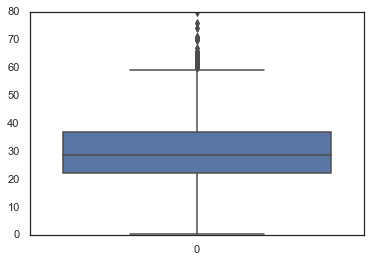

In [184]:
sns.boxplot(data=titanic.age);


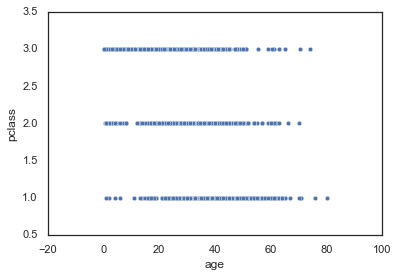

In [170]:
sns.scatterplot(data=titanic, x='age', y='pclass');


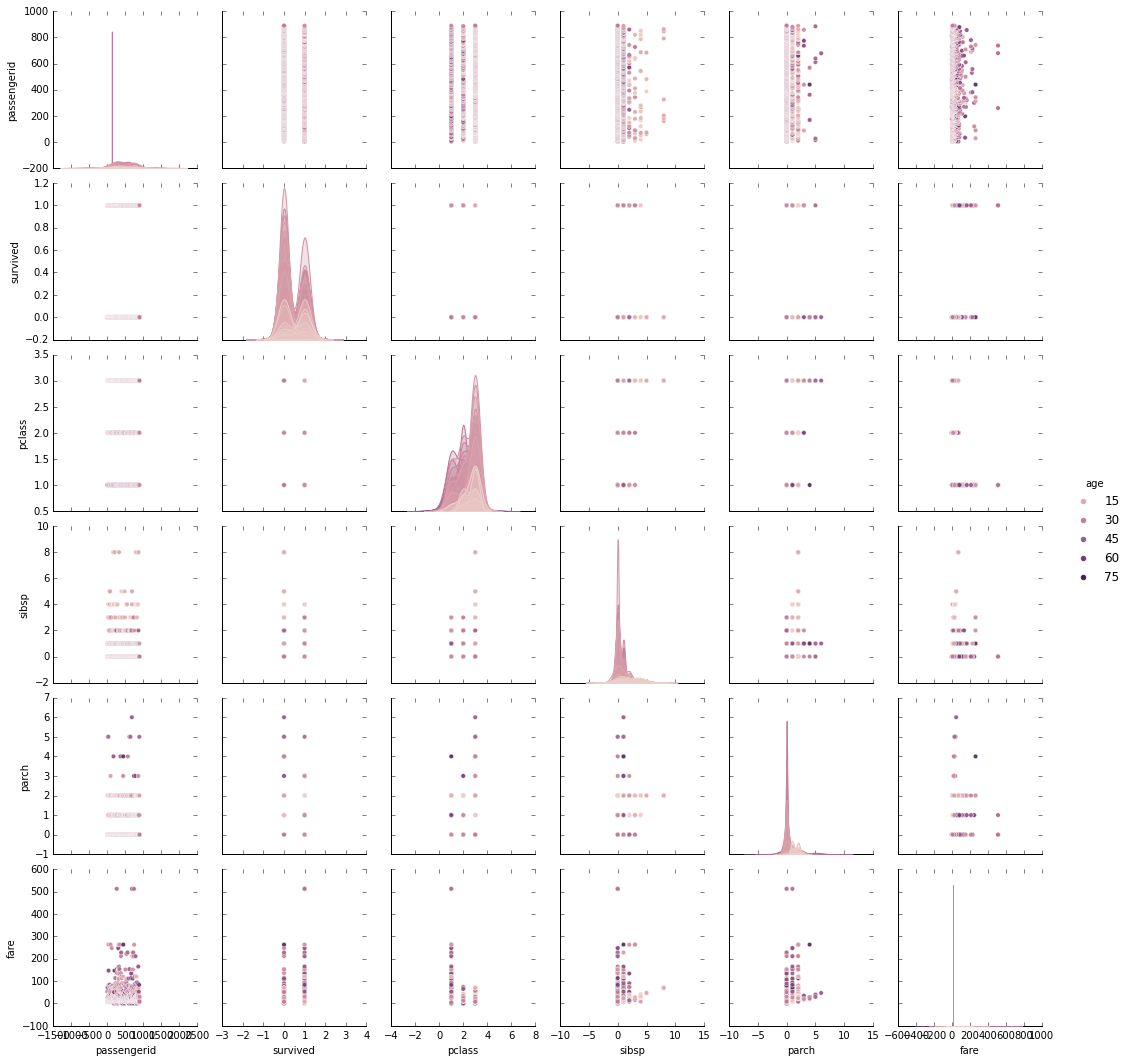

In [162]:
# your code here

sns.pairplot(titanic.dropna(), hue='age');


In [ ]:
"""
your comments here

En ese caso supuestamente escoge una cuarta dimension, el color como edad
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

la distribución de la edad en las diferentes variables,  por ejemplo que la mayoria de gente palmo de clase 1, donde se concentran mas edades
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

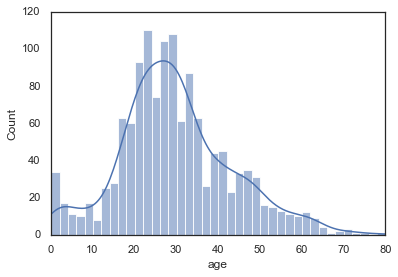

In [171]:
# your code here
sns.histplot(x=titanic.age, 
             bins=40,
             kde=True  # kernel density estimation
            );

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
simply the main group was btw 20 and 35
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

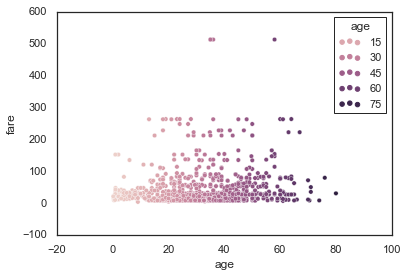

In [183]:
# Method 1 - matplotlib
sns.scatterplot(data=titanic[titanic.fare >1], 
                hue='age',
                x='age', 
                y='fare');

In [188]:
df=titanic.groupby('age').sum()[['fare']]

df.head()

,fare
age,
0.17,20.5750
0.33,14.4000
0.42,8.5167
0.67,14.5000
0.75,52.2916


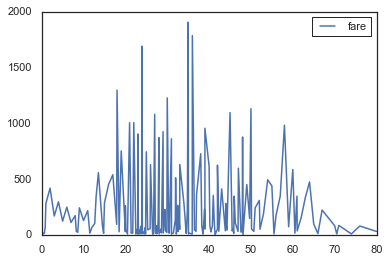

In [189]:
# Method 2 - seaborn
plt.plot(df)

plt.legend(df.columns);

#### Plot the correlation matrix using seaborn.

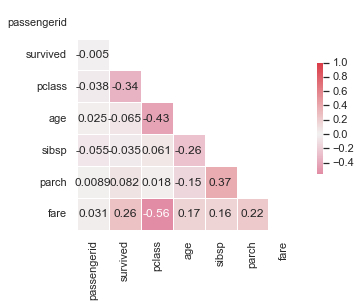

In [191]:
# your code here

corr=titanic.corr(method='pearson')
corr

sns.set(style='white')     # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );


#### What are the most correlated features?

In [ ]:
"""
los que sobreviven y el preico del ticket
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

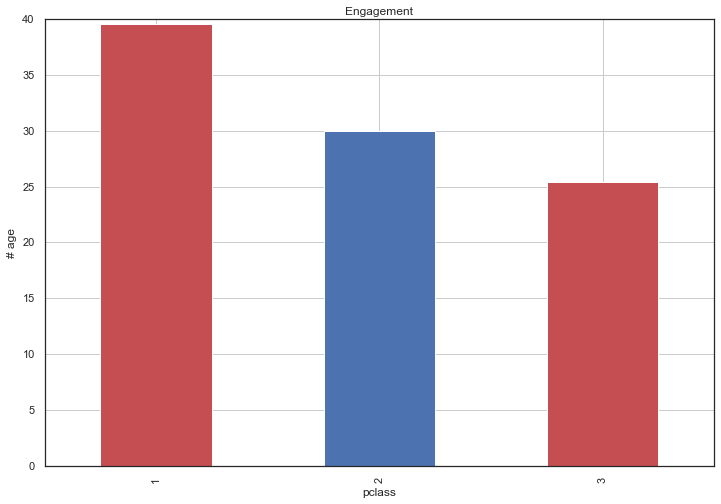

In [230]:
# your code here
ax=titanic.groupby('pclass').mean().age.plot(
        
        kind='bar',
        color=['r', 'b'],
        grid=True,
        figsize=(12, 8),
        title='Engagement'
)

ax.set_xlabel('pclass')
ax.set_ylabel('# age')

plt.show();


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

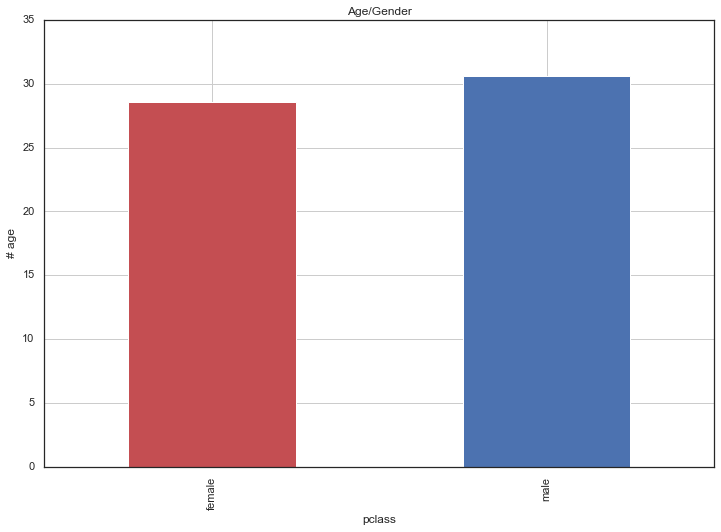

In [238]:
ax=titanic.groupby('gender').mean().age.plot(
        
        kind='bar',
        color=['r', 'b'],
        grid=True,
        figsize=(12, 8),
        title='Age/Gender'
)

ax.set_xlabel('pclass')
ax.set_ylabel('# age')

plt.show();

<AxesSubplot:xlabel='gender', ylabel='age'>

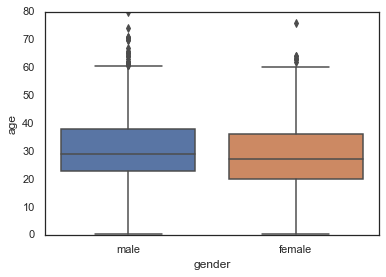

In [239]:
sns.boxplot(x='gender', y='age', data=titanic)
